# Week 5 - Sampling & Reliability

Up until this week, we have assumed that the corpus you have used for analysis assignments represented a *meaningful* assemblage of texts from which reasonable inferences could be drawn about the social game, social world and social actors that produced it. This week, we ask you to articulate what your sample represents in context of your final project, and draw upon methods we have developed over the last three weeks to draw reasonable and representative samples. 

This week we also pivot from our recent work on unsupervized machine learning approaches to explore how we can get *human* readings of content at scale. We want to gather and utilize human responses for several reasons. First, we may want to use crowdsourced human scores as the primary method of coding, extracting or organizing content (as it was in the two of the assigned readings). Second, we may want to validate or tune a computational algorithm we may have developed in terms of how it is associated with human meanings or experience. Finally, we may want to use human coding on a sample of data as the basis for training a model or algorithm to then extrapolate *human-like* annotations to the entire population. Here intelligent sampling is critical to maximize effective maching training. 

For this notebook we will be using the following packages

In [379]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git

#All these packages need to be installed from pip
import gensim#For word2vec, etc
import numpy as np #For arrays
import scipy as sp #For some stats
import pandas #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import pyanno #On python3 make sure to pip install pyanno3
import nltk #For stop words and stemmers

#We need to import these this way due to how pyanno is setup
from pyanno.measures import pairwise_matrix, agreement, cohens_kappa, cohens_weighted_kappa, fleiss_kappa, krippendorffs_alpha, pearsons_rho, scotts_pi, spearmans_rho
from pyanno.annotations import AnnotationsContainer
from pyanno.models import ModelA, ModelBt, ModelB

from functools import reduce
from itertools import permutations
import math


#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics
import sklearn.cluster.k_means_
import km.cluster_centers_.argsort

ModuleNotFoundError: No module named 'km'

## <span style="color:red">*Pitch Your Project*</span>

<span style="color:red">In the three cells immediately following, describe **WHAT** you are planning to analyze for your final project (i.e., texts, contexts and the social game, world and actors you intend to learn about through your analysis) (<200 words), **WHY** you are going to do it (i.e., why would theory and/or the average person benefit from knowing the results of your investigation) (<200 words), and **HOW** you plan to investigate it (i.e., what are the approaches and operations you plan to perform, in sequence, to yield this insight) (<400 words).

## ***What?*** 
<200 words

A *social movement* is a vehicle for ordinary citizens who lack regular access to representative institutions to engage in politics by exerting power through contentious means. They operate in the realm of informal politics. Meanwhile, *political parties* are deemed to stand in the realm of formal politics as unlike social movement, they are seeking to control the government by winning elections. I want to analyze news articles pertaining to 2 Indonesian Islamic Social Movement organizations (SMO), which are **Nahdlatul Ulama (NU)** and **Islamic Defenders Front (FPI)**. I want to find out their relations to (Islamic and secular) **political parties**.

Although there are numerous Islamic parties throughout Indonesia’s post-colonial history, they have never gained significant votes to hold the majority in the government without forming coalitions with secular parties. Meanwhile Islamic party’s alliances with Islamic SMO could further expand the party’s voter base by appealing to the masses through religion. In the other hand, being excluded from formal governance of the nation, contentious politics becomes a way for Islamic SMOs to make political demands through rallies and direct actions in exchange for electoral support to political parties.

Existing research on social movements and the democratization process seem insufficient to explain how Islamic SMOs hold so much political power despite their lack of political representation the formal party politics. How do Islamic SMOs position themselves against Islamic political parties, secular political parties, and the government?

## ***Why?***
<200 words

Linz and Stepan posits that democratization is a two-fold process; democratic transition is fulfilled in the institutional level, such as having regular free elections, while democratic consolidation is fulfilled in relations to the people’s democratic behavior. Despite the introduction of institutional reforms between 1998 and 2005, there is little democratic improvements in Indonesia since then. When democracy is already instituted as 'the only game in town' it seems that Islamic SMOs chose to 'disobey the rule of the game' by opting for contentious politics rather than seeking representation through party politics to gain power. As democratic procedure has become more consolidated Islamic SMO are less engaged with the democratic procedure.

Indonesia’s political and social future could have global ramifications. Indonesia’s experiences could gauge social and political changes within other parts of the Muslim world, such as the Middle East and North Africa. Indonesia poses an alternative ‘third way’ to the choice between a secular state and all-out Islamic rule despite political and social upheavals that continues to challenge its democratization. This study is important to understand how religion shapes democratization processes in new and transitional democracies.

## ***How?***
<400 words

First, I will list the members of the 2 Islamic SMOs of interest and political parties in Indonesia. I will then iterate the names through all news articles where I will check for the mention of the names in each articles. If corresponding names are found, the article will be added to a list. Finally, for all names that co-occur in the list, **1)** *I will draw a tie between them to construct a network visualization and look at the relations besteen political actors*, and **2)** *I will look at the word embeddings around the names and visualize them in a word space to look at each political actors' distance to each other*.

## <span style="color:red">*Pitch Your Sample*</span>

<span style="color:red">In the cell immediately following, describe the rationale behind your proposed sample design for your final project. What is the social game, social work, or social actors you about whom you are seeking to make inferences? What are its virtues with respect to your research questions? What are its limitations? What are alternatives? What would be a reasonable path to "scale up" your sample for further analysis (i.e., high-profile publication)? (<200 words).

## ***Which (words)?***

**Social game:**<br>
Islamic social movement organizations, despite claiming to be 'religiously oriented, not political', are actually political. We can reveal this by looking at their relations to political parties and the claims that they are making (eg. challengeing the government, attempt on instituting Islamic sharia law)<br>

**Social actors:**<br>
*1) Social movement organizations:* a) Islamic Defenders Front (FPI), a vigilante Islamic group; b) Nahdlatul Ulama (NU), a traditionalist Islamic group.
<br>*2) Political parties:* a) secular parties; b) Islamic parties.<br>

**Limitations:**<br>
Data was only available from one newspaper due to the lack of reliable English news media that comprehensively reports local events in Indonesia. News media in Indonesian language cannot be considered as Indonesian is a low resource language for content analysis.<br>

**Alternatives:**<br>
However, Jakarta Post, the newspaper in use here, is one of the most reliable news media in Indonesia. Thus, issues of slant could be avoided.<br>

**Scaling Up the Study:**<br>
The study's results will be used for my MA Thesis.

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">In the cells immediately following, demonstrate three approaches drawn from any of the last three weeks to create subsamples of your corpus (e.g., for crowd-sourced subcoding like we'll be doing this week). Methods of subsampling include (a) corpus linguistic approaches drawing on word presence or co-presence, conditional frequencies, weighted words (e.g., tf.idf), KL or JS divergences, etc.; (b) hierarchical or flat clustering approaches; (c) topic modeling; or (d) word-embedding. (<200 words).

**What:**<br>
Analyzing news articles between 2008 - 2018 on Islamic social movement organizations in Indonesia.

**Dataset**<br>
News articles scraped from Jakarta Post that contains the word 'FPI' (the organization of interest).

**Findings:**<br>
1) We can use tf-idf and apply it to clustering, topic modeling and word embedding.<br>
2) We can use clustering and find patterns of words. On closer look, these patterns tell us 'stories'.<br>
3) Using word embedding we can find words that are related to each other.

**Evaluation**<br>
I will have to process a larger dataset, this might take a long time to process. I am only working with a sample here.

In [277]:
news_DF = pandas.read_csv('FPI.csv', encoding='latin-1')

In [353]:
sample_DF['index'] = range(len(sample_DF))
sample_DF.set_index('index', inplace = True)
print(len(sample_DF))

97


In [354]:
sample_DF = news_DF.sample(frac=0.1)

In [355]:
sample_DF['tokenized_sents'] = sample_DF['Article'].apply(lambda x: 
                                                               [nltk.word_tokenize(s) for s in nltk.sent_tokenize(x)])
sample_DF['normalized_sents'] = sample_DF['tokenized_sents'].apply(lambda x: 
                                                                           [lucem_illud.normalizeTokens(s, 
                                                                                           stopwordLst = lucem_illud.stop_words_basic, 
                                                                                           stemmer = None) 
                                                                            for s in x])

In [356]:
sample_DF[:5]

,Date,Title,Article,Link,Topics,Year,tokenized_sents,normalized_sents
30,"Wed, April 19, 2017",Ahok-Djarot wins in FPI stronghold,Incumbent Jakarta governor and deputy governor...,http://www.thejakartapost.com/news/2017/04/19/...,"FPI, Habib-Rizieq-Shihab, basuki-tjahaja-purna...",2017,"[[Incumbent, Jakarta, governor, and, deputy, g...","[[incumbent, jakarta, governor, deputy, govern..."
727,"Fri, June 15 2012",Govt can take vigilante groups Ôto courtÕ,The government can go to court if it wants to ...,http://www.thejakartapost.com/news/2012/06/15/...,NaN,2012,"[[The, government, can, go, to, court, if, it,...","[[government, go, court, wants, disband, vigil..."
500,"Thu, July 22 2010",Comment: NU bans raids on nightclubs,"July 17, online: Said Aqiel urged NU members t...",http://www.thejakartapost.com/news/2010/07/22/...,NaN,2010,"[[July, 17, ,, online, :, Said, Aqiel, urged, ...","[[july, online, said, aqiel, urged, nu, member..."
195,"Thu, January 21, 2016",Text your say: Harsh action a must if Gafatar ...,Your comments on the so-called Fajar Nusantara...,http://www.thejakartapost.com/news/2016/01/21/...,NaN,2016,"[[Your, comments, on, the, so-called, Fajar, N...","[[comments, fajar, nusantara, movement, gafata..."
98,"Sun, January 15, 2017",Police to screen FPI leader's Pancasila defama...,West Java Police spokesperson Sr. Comr. Yusri ...,http://www.thejakartapost.com/news/2017/01/15/...,"Rizieq-Shihab, FPI, defamation",2017,"[[West, Java, Police, spokesperson, Sr., Comr,...","[[west, java, police, spokesperson, comr], [yu..."


**Topic Modeling** can be used to cluster news article regarding the different organizations to different topics.

In [357]:
#Let's define what we are working with first.
targetDF = sample_DF
textColumn = 'Article'
numCategories = 3

#Initialize
newsTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
newsTFVects = ngTFVectorizer.fit_transform(targetDF[textColumn])

#Running k means

newsKM = sklearn.cluster.KMeans(n_clusters = numCategories, init='k-means++')
newsKM.fit(newsTFVects)

sample_DF['kmeans_predictions'] = newsKM.labels_

**TF-IDF vectorizing** for weighting document-distinguishing words.

In [358]:
newsTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
newsTFVects = newsTFVectorizer.fit_transform(targetDF[textColumn])

**Run K-Means**

In [359]:
newsKM = sklearn.cluster.KMeans(n_clusters = numCategories, init='k-means++')
newsKM.fit(newsTFVects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

And visualize:

In [360]:
newsPCA = sklearn.decomposition.PCA(n_components = 2).fit(newsTFVects.toarray())
newsPCA_data = newsPCA.transform(newsTFVects.toarray())

colors = list(plt.cm.rainbow(np.linspace(0,1, numCategories)))
colors_p = [colors[l] for l in newsKM.labels_]

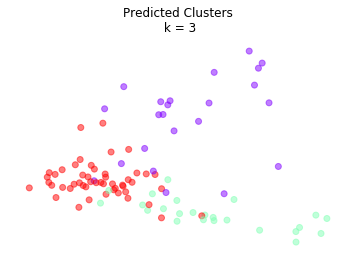

In [361]:
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(newsPCA_data[:, 0], newsPCA_data[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
plt.title('Predicted Clusters\n k = {}'.format(numCategories))
plt.show()

We can also do **flat clustering with K-means**

In [384]:
numClusters = len(set(sample_DF['Year']))

In [385]:
#Initialize cluster finder with k-means++ as a better way of finding the starting points
#We could also try providing our own
km = sklearn.cluster.KMeans(n_clusters=numClusters, init='k-means++')

In [387]:
km.fit(newsTFVects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [388]:
terms = newsTFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 training
 tni
 military
 ministry
 defense
 pdi
 indonesian
 decision
 post
 pki


Cluster 1:
 transgender
 rights
 human
 christmas
 jihad
 social
 yudhoyono
 komnas
 year
 months


Cluster 2:
 rizieq
 chief
 national
 uploaded
 friday
 accused
 youtube
 case
 tito
 video


Cluster 3:
 government
 indonesia
 religious
 religion
 church
 think
 like
 churches
 good
 muslims


Cluster 4:
 rizieq
 case
 investigation
 firza
 suspect
 argo
 questioned
 named
 com
 investigators


Cluster 5:
 president
 rally
 jokowi
 muslim
 islamic
 ahok
 indonesia
 muslims
 governor
 groups


Cluster 6:
 organizations
 court
 mass
 foreign
 government
 alcoholic
 sulawesi
 review
 ministry
 radical


Cluster 7:
 java
 semarang
 residents
 entertainment
 violence
 central
 law
 ramadan
 groups
 hotel


Cluster 8:
 ahok
 novel
 hearing
 governor
 ahokõs
 islands
 purnama
 tjahaja
 basuki
 lawyers




*Here we can see how different clusters tells different stories already. Cluster 5 for example tells us a story about how there were rallies to protest Ahok, Indonesian capital city's governor by Muslim groups.*

We can also use **word embedding** where we will be using the gensim implementation of Word2Vec. To load our data, we give all the sentences to the trainer. We just need to add the words as a list of sentences:

In [345]:
news_W2V = gensim.models.word2vec.Word2Vec(sample_DF['normalized_sents'].sum())

In [389]:
#Full matrix, syn0 stores all the vectors:
news_W2V.wv.syn0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  


array([[ 0.06065331, -0.04595248,  0.32255018, ..., -0.13801083,
         0.00915596,  0.0095327 ],
       [ 0.0435629 , -0.03086524,  0.26077092, ..., -0.11158327,
         0.00478263,  0.01206834],
       [ 0.04488036, -0.03963696,  0.2707129 , ..., -0.11109066,
         0.0055026 ,  0.01389261],
       ...,
       [-0.00139782,  0.00277829,  0.01536196, ..., -0.0102539 ,
        -0.00361513,  0.00062317],
       [ 0.00101417, -0.00333694,  0.01707343, ..., -0.00162496,
         0.00160485,  0.00056066],
       [ 0.00771506, -0.00165283,  0.01525968, ..., -0.0061657 ,
        -0.00420471,  0.00186862]], dtype=float32)

Now we can look at a few things that come from the word vectors. The first is to find similar vectors (cosine similarity):

In [347]:
news_W2V.most_similar('fpi')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('police', 0.9995384812355042),
 ('jakarta', 0.999517560005188),
 ('said', 0.9995057582855225),
 ('members', 0.9994665384292603),
 ('indonesian', 0.9994262456893921),
 ('people', 0.9994025230407715),
 ('ó', 0.9993983507156372),
 ('muslim', 0.9993770122528076),
 ('groups', 0.9993535280227661),
 ('islam', 0.9993338584899902)]

In [348]:
news_W2V.most_similar('rizieq')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('fpi', 0.9985607862472534),
 ('members', 0.9985058903694153),
 ('group', 0.9984493255615234),
 ('jakarta', 0.9984472990036011),
 ('muslim', 0.9984011650085449),
 ('also', 0.9983763694763184),
 ('police', 0.9983509182929993),
 ('national', 0.9983260035514832),
 ('islam', 0.9983003735542297),
 ('said', 0.9982659816741943)]

*The word FPI (referring to Islamic Defenders Front) is more closely related to people, members, and police. This may explain how FPI is a grassroots mass organization that is often engaged with the police. Meanwhile, Rizieq is FPI's leader, which explains why words related to him nearly mirrors to words 'most similar' to FPI.*

# Example Annotation Dataset

Load Rzhetsky et al (2009)'s sample dataset, which can be found [here](https://github.com/enthought/uchicago-pyanno/tree/master/data). This data is the result of a content analytic / content extraction study in which Andrey Rzhetsky and colleagues from the National Library of Medicine, published [here](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1000391) in [PLOS Computational Biology](http://journals.plos.org/ploscompbiol/), gave eight annotators 10,000 sentence chunks from biomedical text in biomedical abstracts and articles, then asked them, in a loop design schematically illustrated below that provided 3 independent codings for each document. The sampling strategy pursued diversity by drawing from PubMed abstracts (1000) and full-text articles (9000: 20% from abstracts, 10% from introductions, 20% from methods, 25% from results, and 25% from discussions.) The dataset extract here involves respondents codes for sentences in terms of their *Evidence*: {0, 1, 2, 3, -1} where 0 is the complete lack of evidence, 3 is direct evidence present within the sentence, and -1 is didn't respond. (They also crowdsourced and analyzed *polarity*, *certainty*, and *number*). For example, consider the following two abutting sentence chunks: *"Because null mutations in toxR and toxT abolish CT and TcpA expression in the El Tor biotype and also attenuate virulence..."* [i.e., average certainty = 0], *"...it is likely that the ToxR regulon has functional similarities between the two biotypes despite the clear differences in the inducing parameters observed in vitro"* [i.e., average certainty = 1]."

In [292]:
x = np.loadtxt("../data/pyAnno/testdata_numerical.txt")
anno = AnnotationsContainer.from_array(x, missing_values=[-1])

Interrogate the AnnotationsContainer object.

In [293]:
anno.annotations

array([[ 1,  2,  3, ..., -1, -1, -1],
       [ 0,  0,  0, ..., -1, -1, -1],
       [ 2,  2,  1, ..., -1, -1, -1],
       ...,
       [ 2,  2, -1, ..., -1, -1,  1],
       [ 2,  2, -1, ..., -1, -1,  3],
       [ 1,  1, -1, ..., -1, -1,  0]])

In [294]:
anno.labels

[1.0, 2.0, 3.0, 4.0]

In [295]:
anno.missing_values

[-1]

# Annotation Statistics

First, we assume categorical codes...that each code is qualitatively distinct from each other. Two measures are primarily used for this: Scott's $\pi$, Cohen's $\kappa$, and Krippendorff's $\alpha$ which each measure the extent of agreement between two annotators, but take into account the possibility of the agreement occurring by chance in slightly different ways. Any agreement measure begins with the frequency of codes:

In [296]:
pyanno.measures.agreement.labels_frequency(anno.annotations,4)

array([0.11666667, 0.245     , 0.34083333, 0.2975    ])

Now consider the "confusion matrix" or matrix of coded agreements between any two coders:

[[ 8.  7.  3.  2.]
 [ 9. 30. 13.  3.]
 [ 2.  9. 42. 11.]
 [ 1.  7. 14. 39.]]


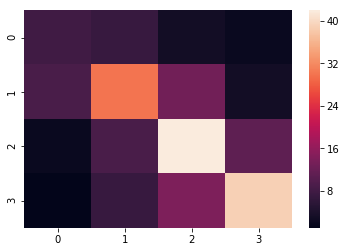

In [297]:
c = pyanno.measures.agreement.confusion_matrix(anno.annotations[:,0], anno.annotations[:,1],4)
print(c)
ac = seaborn.heatmap(c)
plt.show()

Scott's $\pi$ is computed as:

$\pi = \frac{\text{Pr}(a)-\text{Pr}(e)}{1-\text{Pr}(e)}$

Where Pr($a$) is relative observed agreement, and Pr($e$) is expected agreement using joint proportions calculated from the confusion matrix or matrix of coded agreements between any two coders:

In [298]:
scotts_pi(anno.annotations[:,0], anno.annotations[:,1])

0.4386478265891502

The generalization of Scott's $\pi$ to $n$ coders is Fleiss' $\kappa$ (Fleiss called it $\kappa$ because he thought he was generalizing Cohen's $\kappa$)

In [299]:
fleiss_kappa(anno.annotations[::])

0.40417653771912765

Krippendorff's $\alpha$ generalizes of Fleiss' $\kappa$ to $n$ coders and takes into account the fact that annotations here are not categorically different, but ordinal, by adding a weight matrix in which off-diagonal cells contain weights indicating the seriousness of the disagreement between each score. When produced with no arguments, it simply produces an arithmetic distance (e.g., 3-1=2), such that cells one off the diagonal are weighted 1, two off 2, etc.

In [300]:
krippendorffs_alpha(anno.annotations[::])

0.6472588223831547

Like Scott's $\pi$, Cohen's $\kappa$ also takes into account the possibility of the agreement occurring by chance, but in the following way:

$\kappa = \frac{p_o-p_e}{1-p_e}=1-\frac{1-p_o}{p_e}$

where $p_o$ is the relative observed agreement among raters, and $p_e$ is the hypothetical probability of chance agreement, using the observed data to calculate the probabilities of each observer randomly saying each category. If the raters are in complete agreement then $\kappa = 1$. If there is no agreement among the raters other than what would be expected by chance (as given by $p_e$), $\kappa ≤ 0 $. Here, Cohen's $\kappa$ statistic for the first two annotators is computed. This is probably the most common metric of agreement.

In [301]:
cohens_kappa(anno.annotations[:,0], anno.annotations[:,1])

0.43917037219392857

In [302]:
m = pairwise_matrix(cohens_kappa, anno.annotations)
print(m)

[[1.         0.43917037 0.47677621        nan        nan        nan
  0.45819119 0.43381462]
 [0.43917037 1.         0.38432922 0.41344423        nan        nan
         nan 0.33643611]
 [0.47677621 0.38432922 1.         0.39583333 0.51704894        nan
         nan        nan]
 [       nan 0.41344423 0.39583333 1.         0.34597068 0.4446844
         nan        nan]
 [       nan        nan 0.51704894 0.34597068 1.         0.37938644
  0.43039733        nan]
 [       nan        nan        nan 0.4446844  0.37938644 1.
  0.38341929 0.31214748]
 [0.45819119        nan        nan        nan 0.43039733 0.38341929
  1.         0.394806  ]
 [0.43381462 0.33643611        nan        nan        nan 0.31214748
  0.394806   1.        ]]


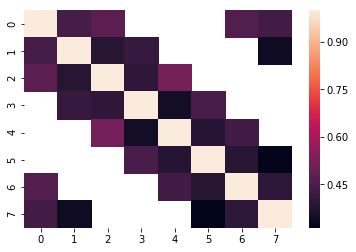

In [303]:
ax = seaborn.heatmap(m)
plt.show()

You can see that this 8 by 3 loop design will be less stable than an 8 choose 3 combinatorial design, because each codes with more others. 

One can also assess the average Cohen's $\kappa$ for all pairs of coders that have coded against one another:

In [304]:
def pairwise_metric_average(metric, array):
    """Calculate the pairwise metric average for the real elements of metric function run on an array of annotations"""
    p = permutations(range(array[0,:].size),2)
    m = [metric(array[:,x[0]], array[:,x[1]]) for x in p]
    clean_m = [c for c in m if not math.isnan(c)]
    return reduce(lambda a, b: a + b, clean_m)/len(clean_m)    
 
pairwise_metric_average(cohens_kappa, anno.annotations)

0.40911598940065674

As recognized with Krippendorff's flexible $\alpha$, our scores are *not* categorical, but rather ordered and her considered metric. Weighted $\kappa$ allows you to count disagreements differently and is useful when codes are ordered as they are here. Here a weight matrix is added to the calculation, in which off-diagonal cells contain weights indicating the seriousness of the disagreement between each score. When automatically produced, it simply produces an arithmetic distance (e.g., 3-1=2), such that cells one off the diagonal are weighted 1, two off 2, etc. Here

$\kappa = 1-\frac{\sum^k_{i=1}\sum^k_{j=1}w_{ij}x_{ij}}{\sum^k_{i=1}\sum^k_{j=1}w_{ij}m_{ij}}$

where $\kappa$ = $n$ codes and $w_{ij}$,$x_{ij}$, and $m_{ij}$ represent elements in the weight, observed, and expected matrices, respectively. (Obviously, when diagonal cells contain weights of 0 and off-diagonal cells weights of 1, this equals $\kappa$).

In [305]:
cohens_weighted_kappa(anno.annotations[:,0], anno.annotations[:,1])

0.5330240507874497

Or averaged over the total:

In [306]:
pairwise_metric_average(cohens_weighted_kappa,anno.annotations)

0.5299113458717166

Alternatively, if the annontation data can be understood as indicating real values, we can assess not agreement, but rather the correlation of values (Pearson's $\rho$) or correlation of ranks (Spearman's $\rho$) for pairs of coders:

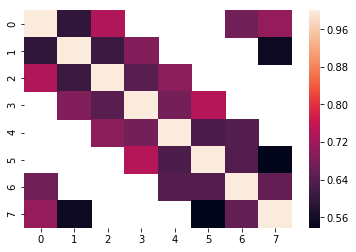

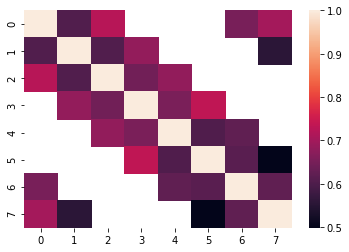

In [307]:
n = pairwise_matrix(pearsons_rho, anno.annotations)
m = pairwise_matrix(spearmans_rho, anno.annotations)
an = seaborn.heatmap(n)
plt.show()
am = seaborn.heatmap(m)
plt.show()

Or averaged over all comparable pairs:

In [308]:
print(pairwise_metric_average(pearsons_rho,anno.annotations), pairwise_metric_average(spearmans_rho,anno.annotations))

0.6517219321175077 0.63808488688039


## <span style="color:red">*Excercise 2*</span>

<span style="color:red">Perform a content annotation survey of some kind in which at least 3 people evaluate and code each piece of content, using Amazon Mechanical Turk as described in the MTurk slides on this week's Canvas page.  With the resulting data, calculate, visualize and discuss inter-coder agreement or covariation with appropriate metrics. What does this means for the reliability of human assessments regarding content in your domain?

**What:**<br>
I asked the coders in MTurk to rate foods (eg. taco, fried chicken, sushi etc.) as looking 'very healthy' (2), 'healthy' (1), and 'not healthy' (0).

**Dataset**<br>
MTurk survey result on perception of food. 

**Findings:**<br>
1) Using Cohen's $\kappa$, there seems to be some agreements between the coders, although not much (as reflected by the many darker shades of purple and black in the heatmap.<br>
2) Using correlations, there seems to be a lot more agreements detected. However, there still seems to be some disagreement detected between coders.

**Evaluation**<br>
I made a very short survey with a lot of pictures and made the task as simple as possible to keep their focus and capture their candid reactions. However, I believe that if I have done longer surveys with more text-heavy content people will be less reliable as they might answer randomly.

In [516]:
x = np.loadtxt("food_test_copy.txt")
anno = AnnotationsContainer.from_array(x, missing_values=[-1])

Interrogate the AnnotationsContainer object.

In [517]:
anno.annotations

array([[2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1],
       [1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0],
       [1, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1],
       [1, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1],
       [2, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 2, 1, 0, 0, 1, 1, 2, 1],
       [1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1],
       [2, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0],
       [1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 0]])

In [518]:
anno.labels

[0.0, 1.0, 2.0]

In [519]:
anno.missing_values

[]

**Annotation Statistics**

In [490]:
pyanno.measures.agreement.labels_frequency(anno.annotations,3)

array([0.33636364, 0.59090909, 0.07272727])

Now consider the "confusion matrix" or matrix of coded agreements between any two coders:

[[0. 0. 0. 0.]
 [2. 5. 0. 0.]
 [1. 2. 0. 0.]
 [0. 0. 0. 0.]]


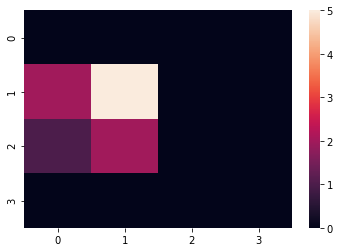

In [491]:
c = pyanno.measures.agreement.confusion_matrix(anno.annotations[:,0], anno.annotations[:,1],4)
print(c)
ac = seaborn.heatmap(c)
plt.show()

Scott's $\pi$ is computed as:

$\pi = \frac{\text{Pr}(a)-\text{Pr}(e)}{1-\text{Pr}(e)}$

Where Pr($a$) is relative observed agreement, and Pr($e$) is expected agreement using joint proportions calculated from the confusion matrix or matrix of coded agreements between any two coders:

In [492]:
scotts_pi(anno.annotations[:,0], anno.annotations[:,1])

-0.07526881720430088

The generalization of Scott's $\pi$ to $n$ coders is Fleiss' $\kappa$ (Fleiss called it $\kappa$ because he thought he was generalizing Cohen's $\kappa$)

In [493]:
fleiss_kappa(anno.annotations[::])

-0.02794163303321949

Krippendorff's $\alpha$ generalizes of Fleiss' $\kappa$ to $n$ coders and takes into account the fact that annotations here are not categorically different, but ordinal, by adding a weight matrix in which off-diagonal cells contain weights indicating the seriousness of the disagreement between each score. When produced with no arguments, it simply produces an arithmetic distance (e.g., 3-1=2), such that cells one off the diagonal are weighted 1, two off 2, etc.

In [494]:
krippendorffs_alpha(anno.annotations[::])

-0.013336578242881592

Like Scott's $\pi$, Cohen's $\kappa$ also takes into account the possibility of the agreement occurring by chance, but in the following way:

$\kappa = \frac{p_o-p_e}{1-p_e}=1-\frac{1-p_o}{p_e}$

where $p_o$ is the relative observed agreement among raters, and $p_e$ is the hypothetical probability of chance agreement, using the observed data to calculate the probabilities of each observer randomly saying each category. If the raters are in complete agreement then $\kappa = 1$. If there is no agreement among the raters other than what would be expected by chance (as given by $p_e$), $\kappa ≤ 0 $. Here, Cohen's $\kappa$ statistic for the first two annotators is computed. This is probably the most common metric of agreement.

In [495]:
cohens_kappa(anno.annotations[:,0], anno.annotations[:,1])

0.019607843137255027

In [496]:
m = pairwise_matrix(cohens_kappa, anno.annotations)
print(m)

[[ 1.          0.01960784  0.03225806 -0.17647059 -0.17647059  0.06976744
   0.02777778 -0.2195122   0.02777778 -0.31578947  0.13793103]
 [ 0.01960784  1.          0.09090909  0.18918919 -0.08108108  0.19354839
   0.44444444 -0.2195122   0.07407407 -0.13636364  0.34782609]
 [ 0.03225806  0.09090909  1.          0.01098901 -0.0989011  -0.15384615
   0.28571429 -0.20481928  0.28571429  0.02173913  0.13793103]
 [-0.17647059  0.18918919  0.01098901  1.         -0.11111111  0.02439024
   0.0625     -0.11111111 -0.09375    -0.15384615 -0.08695652]
 [-0.17647059 -0.08108108 -0.0989011  -0.11111111  1.          0.02439024
  -0.09375     0.25925926 -0.09375    -0.15384615 -0.08695652]
 [ 0.06976744  0.19354839 -0.15384615  0.02439024  0.02439024  1.
   0.09090909 -0.05263158  0.09090909 -0.07142857  0.28571429]
 [ 0.02777778  0.44444444  0.28571429  0.0625     -0.09375     0.09090909
   1.         -0.29032258  0.16666667 -0.02941176  0.23076923]
 [-0.2195122  -0.2195122  -0.20481928 -0.11111111

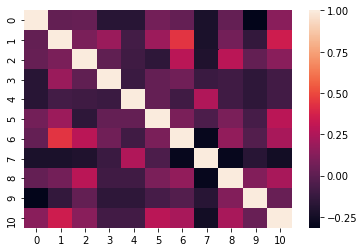

In [497]:
ax = seaborn.heatmap(m)
plt.show()

*There seems to be some agreements between the coders, although not much (as reflected by the many darker shades of purple and black in the heatmatp).*

One can also assess the average Cohen's $\kappa$ for all pairs of coders that have coded against one another:

In [498]:
def pairwise_metric_average(metric, array):
    """Calculate the pairwise metric average for the real elements of metric function run on an array of annotations"""
    p = permutations(range(array[0,:].size),2)
    m = [metric(array[:,x[0]], array[:,x[1]]) for x in p]
    clean_m = [c for c in m if not math.isnan(c)]
    return reduce(lambda a, b: a + b, clean_m)/len(clean_m)    
 
pairwise_metric_average(cohens_kappa, anno.annotations)

0.0016573340717244145

As recognized with Krippendorff's flexible $\alpha$, our scores are *not* categorical, but rather ordered and her considered metric. Weighted $\kappa$ allows you to count disagreements differently and is useful when codes are ordered as they are here. Here a weight matrix is added to the calculation, in which off-diagonal cells contain weights indicating the seriousness of the disagreement between each score. When automatically produced, it simply produces an arithmetic distance (e.g., 3-1=2), such that cells one off the diagonal are weighted 1, two off 2, etc. Here

$\kappa = 1-\frac{\sum^k_{i=1}\sum^k_{j=1}w_{ij}x_{ij}}{\sum^k_{i=1}\sum^k_{j=1}w_{ij}m_{ij}}$

where $\kappa$ = $n$ codes and $w_{ij}$,$x_{ij}$, and $m_{ij}$ represent elements in the weight, observed, and expected matrices, respectively. (Obviously, when diagonal cells contain weights of 0 and off-diagonal cells weights of 1, this equals $\kappa$).

In [499]:
cohens_weighted_kappa(anno.annotations[:,0], anno.annotations[:,1])

-2.220446049250313e-16

Averaged over the total:

In [500]:
pairwise_metric_average(cohens_weighted_kappa,anno.annotations)

0.009690965073076301

Alternatively, if the annontation data can be understood as indicating real values, we can assess not agreement, but rather the correlation of values (Pearson's $\rho$) or correlation of ranks (Spearman's $\rho$) for pairs of coders:

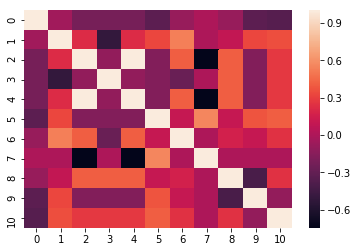

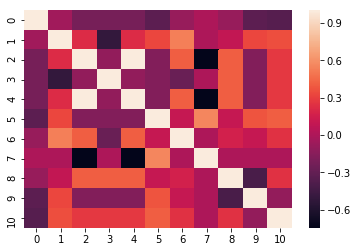

In [501]:
n = pairwise_matrix(pearsons_rho, anno.annotations)
m = pairwise_matrix(spearmans_rho, anno.annotations)
an = seaborn.heatmap(n)
plt.show()
am = seaborn.heatmap(m)
plt.show()

*As we can see above, there seems to be a lot more agreements detected with this correlation method, as denoted by the lighter shades in these heatmaps. However, there still seems to be some disagreement denoted by black boxes in the heatmaps, which shows little correlation between coders.*

Or averaged over all comparable pairs:

In [502]:
print(pairwise_metric_average(pearsons_rho,anno.annotations), pairwise_metric_average(spearmans_rho,anno.annotations))

0.04268853624432027 0.042688536244320265


# Models

However, what if some coders are better than others. The prior measures all rely on the assumption that all coders are equally good. What if some are worse than others? Now we use Rzhetsky et al (2009) and Dawid & Skene's models to make inference about true label classes by downweighting bad or deviant coders. Pyanno provides two relevant models: ModelB and ModelBt. Model B with $\theta$s models the relationship between each coder and code. Model B is a Bayesian generalization of the Dawid & Skene model from the reading. The following image schematically describes these models. <img src="../data/pyanno/Bmodel.png">

The models should provide very similar results. To estimate the parameters for any models, we first need to create a new model. 

In [449]:
# create a new instance of model B, with 4 label classes
model = ModelB.create_initial_state(4,8)
# other model parameters are initialized from the model prior
print(model.theta)
print(model.log_likelihood(anno.annotations))

[[[7.08043728e-01 2.22835173e-01 6.84319342e-02 6.89165249e-04]
  [2.65956516e-01 4.73964829e-01 1.71366977e-01 8.87116782e-02]
  [5.72038648e-02 3.02935128e-01 4.27122995e-01 2.12738013e-01]
  [6.00985148e-03 8.44997174e-02 3.55060303e-01 5.54430129e-01]]

 [[6.49837234e-01 1.62873706e-01 1.34531817e-01 5.27572428e-02]
  [2.25111376e-01 5.90201269e-01 1.51023856e-01 3.36634987e-02]
  [1.83263875e-02 1.16363363e-01 7.77021668e-01 8.82885821e-02]
  [1.03219124e-01 5.09991089e-02 2.96153397e-01 5.49628370e-01]]

 [[5.43527523e-01 1.61844011e-01 2.78489818e-01 1.61386480e-02]
  [2.60402301e-01 6.11352207e-01 8.93123931e-02 3.89330987e-02]
  [1.18590863e-01 1.26082721e-01 6.37703852e-01 1.17622564e-01]
  [9.69858740e-03 3.56339354e-01 9.44551727e-02 5.39506886e-01]]

 [[5.23797494e-01 2.56316859e-01 1.27646075e-01 9.22395714e-02]
  [1.43081107e-01 5.77331566e-01 2.33767111e-01 4.58202158e-02]
  [1.10376158e-02 1.26163579e-01 6.77148653e-01 1.85650152e-01]
  [8.06741932e-03 5.09228810e-02 2

PyannoValueError: Annotations are incompatible with model parameters

Now we train the model on our data. Pyanno allows one to use either MAP (maximum a posteriori estimation) or MLE (maximum likelihood estimation) to estimate model parameters. Note that the parameters here correspond to our estimation of the accuracy of each annotator-annotation pair. First we will train with MAP, and then you can optionally training with MLE.

In [450]:
samples = model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)

PyannoValueError: Annotations are incompatible with model parameters

In [451]:
model.map(anno.annotations)
print(model.theta)
print(model.log_likelihood(anno.annotations))

PyannoValueError: Annotations are incompatible with model parameters

Uncomment the cell below if you would rather train by MLE.

In [452]:
#model = ModelB.create_initial_state(4,8)
#model.mle(anno.annotations)
#print(model.theta)
#print(model.log_likelihood(anno.annotations))

Once we have model parameters estimated, we can now make inferences about the true label classes. We can calculate the posterior distribution over the true label classes.

In [453]:
posterior = model.infer_labels(anno.annotations)
print(posterior)

PyannoValueError: Annotations are incompatible with model parameters

Let's turn the posterior of the first 100 samples into a heatmap and compare with the raw vote tallies.

In [454]:
def makeQuestionComparison(model, anno_target, num_questions = 20):
    votes = []
    for r in anno_target.annotations:
        v = [0] * len(anno_target.labels)
        votes.append(v)
        for a in r:
            if a > -1:
                v[a] += 1
    votes_array = np.array(votes)
    posterior = model.infer_labels(anno_target.annotations)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15, 10), sharey=True)

    seaborn.heatmap(votes_array[:num_questions], annot = True, ax=ax2)
    seaborn.heatmap(np.nan_to_num(posterior,0)[:num_questions], annot=True, ax =ax1)
    ax1.set_title("Model")
    ax2.set_title("Votes")
    return fig, (ax1, ax2)

In [455]:
makeQuestionComparison(model, anno)

PyannoValueError: Annotations are incompatible with model parameters

This differs markedly from taking annotator scores at face value. As you can see (the model-based probabilities are on left; the raw votes on right), the models helps us break ties between coders and in some cases dramatically downgrades the estimates from particularly bad coders.

Let's try everything again with ModelBt, which constrains ModelB so that each coder has a single estimate over the accuracy of all of their codes.

In [456]:
# create a new instance of model B, with 4 label classes and 8 annotators.
model = ModelBt.create_initial_state(4, 8)
print(model.theta)
print(model.log_likelihood(anno.annotations))

[0.76306646 0.68800992 0.65132693 0.63776636 0.76244582 0.81252996
 0.87612014 0.82247103]


PyannoValueError: Annotations are incompatible with model parameters

In [457]:
model.map(anno.annotations)
print(model.theta)
print(model.log_likelihood(anno.annotations))

PyannoValueError: Annotations are incompatible with model parameters

In [458]:
model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)

PyannoValueError: Annotations are incompatible with model parameters

In [459]:
posterior = model.infer_labels(anno.annotations)
print(posterior)

PyannoValueError: Annotations are incompatible with model parameters

Let's visualize the posterior of the first 10 samples according to ModelBt.

In [460]:
makeQuestionComparison(model, anno)

PyannoValueError: Annotations are incompatible with model parameters

The property of these scores is that they enable us to identify the most likely code assuming coders of unequal quality, which also allows us to break ties when we know coder identity. We may also use the posterior themselves rather than the most probably code outcome.

## Visualizing coder accuracy

Let's make a plot of the accuracy for each annotator inferred from ModelBt. This might be helpful if you wanted to ban a "troll" from your crowdsourcing enterprise. The coder a very low accuracy likelihood is an outlier and should be "dropped from the team."

In [461]:
model = ModelBt.create_initial_state(4,8)
model.mle(anno.annotations)
samples = model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)
y =  samples.mean(axis=0)
y_ci = samples.std(axis=0)

PyannoValueError: Annotations are incompatible with model parameters

In [ ]:
plt.figure()
plt.errorbar(range(8),y, yerr = y_ci)
plt.show()

# Hotel Reviews

If we want to do a simpler analysis we can look at a different data set, here are some hotel reviews from [expedia](https://www.kaggle.com/c/expedia-hotel-recommendations)

In [ ]:
df_hotels = pandas.read_csv('../data/hot_Reviews.csv', index_col=0)
df_hotels[:5]

Here a rank of 0 is a missing value and to simplify things more we will convert from a 1-10 scale to a 1-5 scale, with 0 as missing

In [ ]:
df_hotels = df_hotels.apply(lambda x: x // 2) #integer divide by 2 rounds all values

And we can visualize all the reviews as a heatmap with the missing values greyed out

In [ ]:
fig, ax = plt.subplots(figsize = (20,20))
seaborn.heatmap(df_hotels, cmap='rainbow', ax = ax)
plt.show()

To give the dataframe to pyanno we need to convert to np array and change the nans to intergers, lets use -1

In [ ]:
hot_mat = np.array(df_hotels.fillna(-1).as_matrix())
anno_hot = AnnotationsContainer.from_array(hot_mat, missing_values=[-1])

In [ ]:
anno_hot.annotations

In [ ]:
anno_hot.labels

In [ ]:
anno_hot.missing_values

Look at coder agreement

In [ ]:
pyanno.measures.agreement.labels_frequency(anno_hot.annotations, 6)#6 possible catagories

In [ ]:
c = pyanno.measures.agreement.confusion_matrix(anno_hot.annotations[:,0], anno_hot.annotations[:,1], 6) #6 possible catagories
print(c)
ac = seaborn.heatmap(c)
plt.show()

Most agreement is on 2 i.e. an average hotel and there's little agreement as rating go higher, likely due to scarcity in the sample

In [ ]:
scotts_pi(anno_hot.annotations[:,0], anno_hot.annotations[:,1])

In [ ]:
krippendorffs_alpha(anno_hot.annotations[::])

In [ ]:
cohens_kappa(anno_hot.annotations[:,0], anno_hot.annotations[:,1])

In [ ]:
m = pairwise_matrix(cohens_kappa, anno_hot.annotations)
fig, ax = plt.subplots(figsize = (15, 15))
seaborn.heatmap(m, ax =ax)

And to look at what model Bt thinkgs the correct reviews are:

In [ ]:
model_hot = ModelBt.create_initial_state(6, 49)
model_hot.mle(anno_hot.annotations)
#print(model.theta)
print(model_hot.log_likelihood(anno_hot.annotations))

In [ ]:
makeQuestionComparison(model_hot, anno_hot)

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, use the results of your content annotation survey to predict high and low-quality analysts, then predict MLE or MAP estimates for your codes in question. What do these estimates suggest about the distribution of skill among your coders? How different are these estimates from a majority vote?

**What:**<br>
I asked the coders in MTurk to rate foods (eg. taco, fried chicken, sushi etc.) as looking 'very healthy' (2), 'healthy' (1), and 'not healthy' (0).

**Dataset**<br>
MTurk survey result on perception of food. 

**Findings:**<br>
1) I predicted the MAP estimates for my survey. It seems like the response are quite well-distributed.<br>
2) We can also look at the coders' accuracy. There seems to be 1 coder with low accuracy and the rest varies between medium to high accuracy.

**Evaluation**<br>
I made a very short survey with a lot of pictures and made the task as simple as possible to keep their focus and capture their candid reactions. However, I believe that if I have done longer surveys with more text-heavy content people will be less reliable as they might answer randomly.

Create a new model.

In [520]:
# create a new instance of model B, with 3 label classes
model = ModelB.create_initial_state(3,11)
# other model parameters are initialized from the model prior
print(model.theta)
print(model.log_likelihood(anno.annotations))

[[[0.66638705 0.24870128 0.08491167]
  [0.1451309  0.61719827 0.23767083]
  [0.04477367 0.18375413 0.7714722 ]]

 [[0.85783138 0.12655581 0.01561282]
  [0.19431153 0.58602865 0.21965982]
  [0.06133337 0.22489775 0.71376888]]

 [[0.7046201  0.22274941 0.0726305 ]
  [0.22107815 0.5474599  0.23146196]
  [0.07472504 0.11478331 0.81049165]]

 [[0.48388368 0.34152961 0.17458671]
  [0.33209563 0.46802473 0.19987964]
  [0.03888419 0.10623352 0.85488229]]

 [[0.73357077 0.24280017 0.02362906]
  [0.18886877 0.52746555 0.28366568]
  [0.07643404 0.09103192 0.83253404]]

 [[0.79614785 0.17460948 0.02924266]
  [0.08754705 0.7767111  0.13574185]
  [0.06940092 0.28965214 0.64094694]]

 [[0.78484618 0.14334603 0.07180778]
  [0.18338253 0.7281831  0.08843436]
  [0.0425372  0.16050433 0.79695847]]

 [[0.76196619 0.23650743 0.00152638]
  [0.18283163 0.73815811 0.07901025]
  [0.14842835 0.15565509 0.69591656]]

 [[0.60036878 0.37313214 0.02649908]
  [0.14189177 0.67564095 0.18246728]
  [0.05239364 0.324217

Now we train the model on our data. Pyanno allows one to use either MAP (maximum a posteriori estimation) or MLE (maximum likelihood estimation) to estimate model parameters. Note that the parameters here correspond to our estimation of the accuracy of each annotator-annotation pair. First we will train with MAP.

In [521]:
samples = model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)

In [535]:
model.map(anno.annotations)
print(model.theta)
print(model.log_likelihood(anno.annotations))

[[[0.78947368 0.15789474 0.05263158]
  [0.09677419 0.70967742 0.19354839]
  [0.05263158 0.15789474 0.78947368]]

 [[0.78947368 0.15789474 0.05263158]
  [0.19354839 0.70967742 0.09677419]
  [0.05263158 0.15789474 0.78947368]]

 [[0.78947368 0.15789474 0.05263158]
  [0.38709677 0.51612903 0.09677419]
  [0.05263158 0.15789474 0.78947368]]

 [[0.78947368 0.15789474 0.05263158]
  [0.09677419 0.74193548 0.16129032]
  [0.05263158 0.15789474 0.78947368]]

 [[0.78947368 0.15789474 0.05263158]
  [0.09677419 0.77419355 0.12903226]
  [0.05263158 0.15789474 0.78947368]]

 [[0.78947368 0.15789474 0.05263158]
  [0.35483871 0.5483871  0.09677419]
  [0.05263158 0.15789474 0.78947368]]

 [[0.78947368 0.15789474 0.05263158]
  [0.29032258 0.61290323 0.09677419]
  [0.05263158 0.15789474 0.78947368]]

 [[0.78947368 0.15789474 0.05263158]
  [0.12903226 0.74193548 0.12903226]
  [0.05263158 0.15789474 0.78947368]]

 [[0.78947368 0.15789474 0.05263158]
  [0.29032258 0.61290323 0.09677419]
  [0.05263158 0.157894

Once we have model parameters estimated, we can now make inferences about the true label classes. We can calculate the posterior distribution over the true label classes.

In [536]:
posterior = model.infer_labels(anno.annotations)
print(posterior)

[[2.06322012e-23 1.00000000e+00 3.51845533e-97]
 [4.90014779e-20 1.00000000e+00 1.65063337e-98]
 [2.81838566e-23 1.00000000e+00 4.80625598e-97]
 [1.37934656e-23 1.00000000e+00 3.52834573e-96]
 [5.98906952e-20 1.00000000e+00 3.02616117e-97]
 [5.79994101e-22 1.00000000e+00 9.89076888e-96]
 [3.96674829e-25 1.00000000e+00 1.52203149e-96]
 [4.74540628e-22 1.00000000e+00 8.09244727e-96]
 [1.78187192e-22 1.00000000e+00 1.35051821e-98]
 [3.09483018e-22 1.00000000e+00 3.51845533e-97]]


Let's turn the posterior of the first 100 samples into a heatmap and compare with the raw vote tallies.

In [537]:
def makeQuestionComparison(model, anno_target, num_questions = 20):
    votes = []
    for r in anno_target.annotations:
        v = [0] * len(anno_target.labels)
        votes.append(v)
        for a in r:
            if a > -1:
                v[a] += 1
    votes_array = np.array(votes)
    posterior = model.infer_labels(anno_target.annotations)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15, 10), sharey=True)

    seaborn.heatmap(votes_array[:num_questions], annot = True, ax=ax2)
    seaborn.heatmap(np.nan_to_num(posterior,0)[:num_questions], annot=True, ax =ax1)
    ax1.set_title("Model")
    ax2.set_title("Survey")
    return fig, (ax1, ax2)

(<matplotlib.figure.Figure at 0x121d9ca90>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x121d9cd68>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1233950b8>))

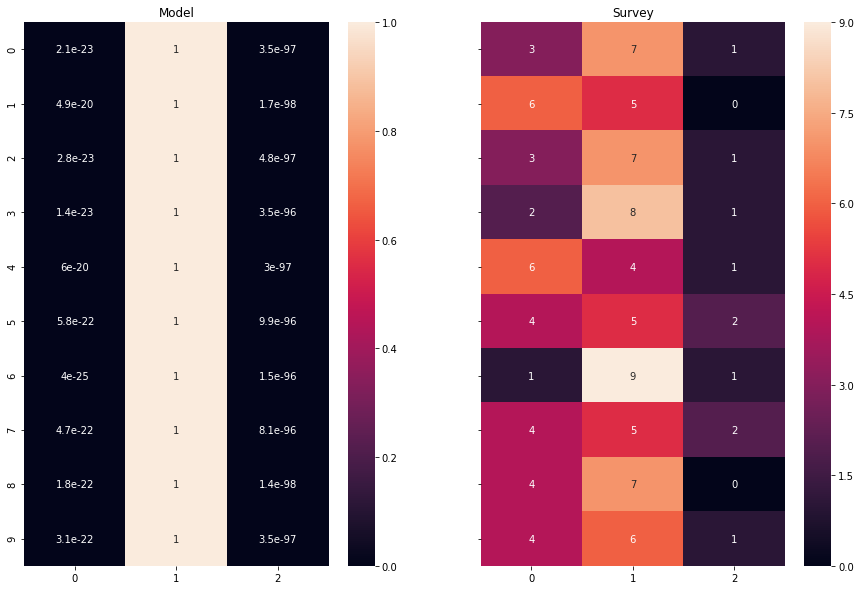

In [538]:
makeQuestionComparison(model, anno)

*This differs markedly from taking annotator scores at face value. As we can see in the model-based probabilities on left and the survey result on the right.*

We can try everything again with ModelBt, which constrains ModelB so that each coder has a single estimate over the accuracy of all of their codes.

In [526]:
# create a new instance of model B, with 3 label classes and 11 annotators.
model = ModelBt.create_initial_state(3, 11)
print(model.theta)
print(model.log_likelihood(anno.annotations))

[0.78798024 0.81917842 0.92212895 0.89240718 0.76855619 0.87594329
 0.72926495 0.8974523  0.65373237 0.92381226 0.67739206]
-137.85757393059


In [527]:
model.map(anno.annotations)
print(model.theta)
print(model.log_likelihood(anno.annotations))

[0.86642124 0.90501878 0.23638963 0.88860192 0.8826426  0.4019865
 0.61845    0.90741399 0.73562031 0.76771201 0.67250066]
-103.92984530381149


In [528]:
model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)

array([[0.79547797, 0.81034329, 0.21854524, ..., 0.69752948, 0.75811613,
        0.40154702],
       [0.79547797, 0.81034329, 0.21854524, ..., 0.69752948, 0.75811613,
        0.40154702],
       [0.79547797, 0.81034329, 0.21854524, ..., 0.69752948, 0.75811613,
        0.40154702],
       ...,
       [0.56821531, 0.94954093, 0.17310299, ..., 0.7007134 , 0.75563949,
        0.60866114],
       [0.56821531, 0.94954093, 0.17310299, ..., 0.7007134 , 0.75563949,
        0.60866114],
       [0.56821531, 0.94954093, 0.17310299, ..., 0.7007134 , 0.75563949,
        0.60866114]])

In [529]:
posterior = model.infer_labels(anno.annotations)
print(posterior)

[[1.74317489e-07 9.99999819e-01 6.39695524e-09]
 [8.64240049e-04 9.99135750e-01 9.63606693e-09]
 [5.16447309e-07 9.99999480e-01 4.00484401e-09]
 [6.54209354e-06 9.99993409e-01 4.89309814e-08]
 [1.10964684e-02 9.88901927e-01 1.60498831e-06]
 [1.74605266e-04 9.99820703e-01 4.69193224e-06]
 [4.70584173e-09 9.99999993e-01 1.95219948e-09]
 [1.59173791e-05 9.99980187e-01 3.89514510e-06]
 [1.41216541e-07 9.99999859e-01 1.23229055e-10]
 [1.49811388e-06 9.99998495e-01 6.82094890e-09]]


Let's visualize the posterior of the first 10 samples according to ModelBt.

(<matplotlib.figure.Figure at 0x119f724e0>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x1223ebcf8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x11bb50908>))

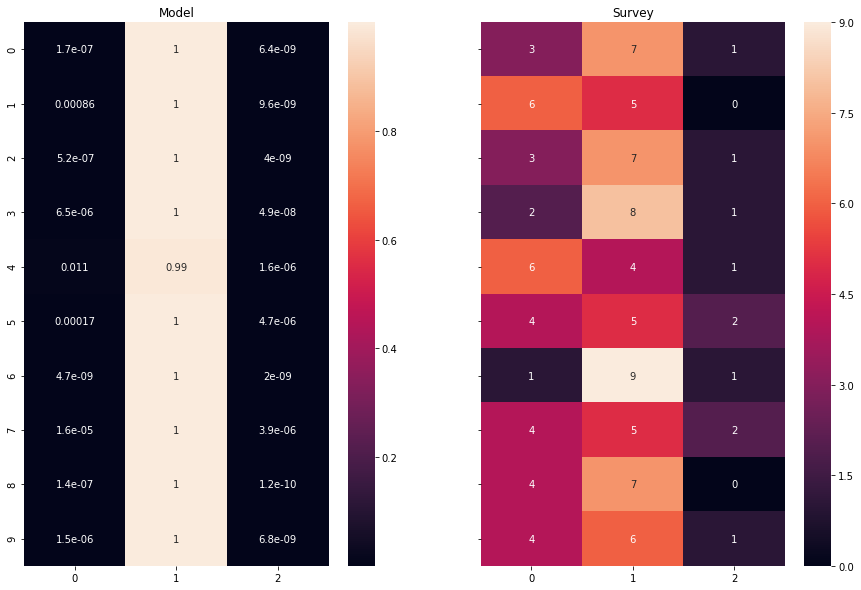

In [530]:
makeQuestionComparison(model, anno)

*The property of these scores is that they enable us to identify the most likely code assuming coders of unequal quality, which also allows us to break ties when we know coder identity. We may also use the posterior themselves rather than the most probably code outcome. Unfortunately, the survey was anonymous, but we can identify 'bad' coders by their unique ID.*

<h3>Visualizing coder accuracy</h3>

Let's make a plot of the accuracy for each annotator inferred from ModelBt. This might be helpful if you wanted to ban a "troll" from your crowdsourcing enterprise. The coder a very low accuracy likelihood is an outlier and should be "dropped from the team."

In [531]:
model = ModelBt.create_initial_state(3,11)
model.mle(anno.annotations)
samples = model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)
y =  samples.mean(axis=0)
y_ci = samples.std(axis=0)
model = ModelBt.create_initial_state(3,11)
model.mle(anno.annotations)
samples = model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)
y =  samples.mean(axis=0)
y_ci = samples.std(axis=0)

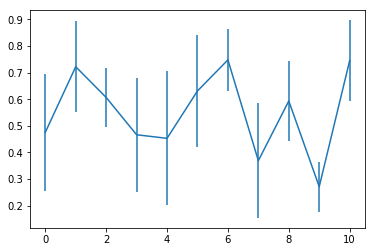

In [533]:
plt.figure()
plt.errorbar(range(11),y, yerr = y_ci)
plt.show()

*There seems to be 1 coder with low accuracy and the rest varies between medium to high accuracy.*